In [5]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

%matplotlib inline

* http://stackoverflow.com/questions/22340808/plotting-a-discriminant-function-for-normal-densities-via-matplotlib
* 

In [ ]:
import numpy as np
from numpy import sin, cos, pi
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(f):
    x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
    vol = f(x, y, z)
    verts, faces = measure.marching_cubes(vol, 0, spacing=(0.1, 0.1, 0.1))[:2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:,2],
                    cmap='Spectral', lw=1)
    plt.show()

# def fun(x, y, z):
#     return cos(x) + cos(y) + cos(z)

def fun(x, y, z):
    return cos(x) + cos(y) + cos(z)

plot3d(fun)

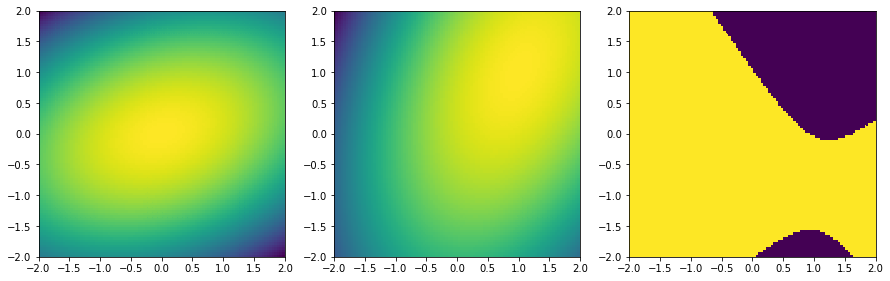

In [21]:
import pylab as pl
import numpy as np

D = 2

M1 = np.array([0.0, 0.0])
M2 = np.array([1.0, 1.0])

C1 = np.array([[2.0, 0.4], [0.4, 1.0]])
C2 = np.array([[1.0, 0.6], [0.6, 2.0]])

X, Y = np.mgrid[-2:2:100j, -2:2:100j]
points = np.c_[X.ravel(), Y.ravel()]

invC = np.linalg.inv(C1)
v = points - M1
g1 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C1))
g1.shape = 100, 100

invC = np.linalg.inv(C2)
v = points - M2
g2 = -0.5*np.sum(np.dot(v, invC) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(C2))
g2.shape = 100, 100

fig, axes = pl.subplots(1, 3, figsize=(15, 5))
ax1, ax2, ax3 = axes.ravel()
for ax in axes.ravel():
    ax.set_aspect("equal")

ax1.pcolormesh(X, Y, g1)
ax2.pcolormesh(X, Y, g2)
ax3.pcolormesh(X, Y, g1 > g2)

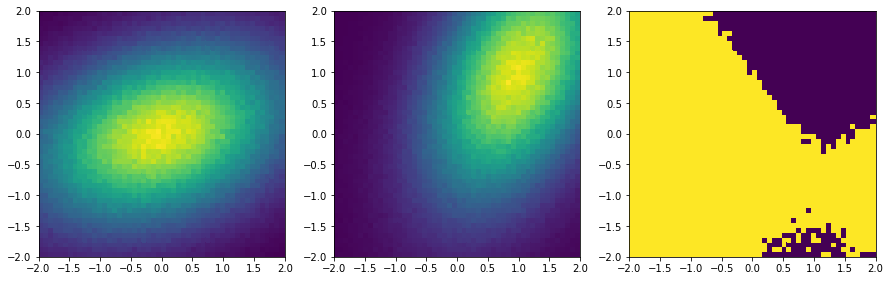

In [22]:
N = 3000000
r1 = np.random.multivariate_normal(M1, C1, N)
r2 = np.random.multivariate_normal(M2, C2, N)

h1, rx, ry = np.histogram2d(r1[:, 0], r1[:, 1], bins=50, range=[[-2, 2], [-2, 2]])
h2, _, _ = np.histogram2d(r2[:, 0], r2[:, 1], bins=50, range=[[-2, 2], [-2, 2]])

rx, ry = np.broadcast_arrays(rx[:, None], ry[None, :])

fig, axes = pl.subplots(1, 3, figsize=(15, 5))
ax1, ax2, ax3 = axes.ravel()
for ax in axes.ravel():
    ax.set_aspect("equal")

ax1.pcolormesh(rx, ry, h1)
ax2.pcolormesh(rx, ry, h2)
ax3.pcolormesh(rx, ry, h1 > h2)